In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

# set defaults
plt.style.use('seaborn-white')   # seaborn custom plot style
plt.rc('figure', dpi=100, figsize=(7, 5))   # set default size/resolution
plt.rc('font', size=12)   # font size

In [3]:
df = pd.read_csv('cleaned_marijuana_data.csv', index_col = 0)
df.head(10)

,ID,GENDER,AGE,EDUCATION_KID,EDUCATION_ADULT,MARRIAGE,PREGNANCY,INCOME,INCOME_RATIO,HOUSEHOLD_NUM,...,EVER_USE,FIRST_USAGE,FREQUENCY,PER_MONTH,PER_YEAR,LAST_ONCE_MONTH,AMOUNT,LAST_USAGE,PAST_MONTH_USAGE,CHILDREN_NUM
0,83732.0,1.0,62.0,NaN,5.0,1.0,NaN,10.0,4.39,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,83733.0,1.0,53.0,NaN,3.0,3.0,NaN,4.0,1.32,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,83735.0,2.0,56.0,NaN,5.0,6.0,NaN,10.0,5.00,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,83736.0,2.0,42.0,NaN,4.0,3.0,1.0,7.0,1.23,5.0,...,1.0,25.0,5.0,1.0,25.0,0.0,4.0,1.0,30.0,2.0
4,83741.0,1.0,22.0,NaN,4.0,5.0,NaN,7.0,2.08,3.0,...,1.0,15.0,4.0,1.0,16.0,1.0,2.0,1.0,25.0,0.0
5,83742.0,2.0,32.0,NaN,4.0,1.0,2.0,6.0,1.03,4.0,...,1.0,18.0,NaN,2.0,NaN,NaN,NaN,13.0,NaN,2.0
6,83743.0,1.0,18.0,11.0,NaN,NaN,NaN,15.0,5.00,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,83744.0,1.0,56.0,NaN,3.0,3.0,NaN,3.0,1.19,1.0,...,1.0,18.0,NaN,2.0,NaN,NaN,NaN,20.0,NaN,0.0
8,83747.0,1.0,46.0,NaN,5.0,6.0,NaN,3.0,0.75,2.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,83750.0,1.0,45.0,NaN,2.0,5.0,NaN,10.0,1.36,5.0,...,1.0,21.0,NaN,2.0,NaN,NaN,NaN,20.0,1.0,2.0


In [4]:
under_26 = df[df['AGE'] <= 26]
under_26.head()

,ID,GENDER,AGE,EDUCATION_KID,EDUCATION_ADULT,MARRIAGE,PREGNANCY,INCOME,INCOME_RATIO,HOUSEHOLD_NUM,...,EVER_USE,FIRST_USAGE,FREQUENCY,PER_MONTH,PER_YEAR,LAST_ONCE_MONTH,AMOUNT,LAST_USAGE,PAST_MONTH_USAGE,CHILDREN_NUM
4,83741.0,1.0,22.0,NaN,4.0,5.0,NaN,7.0,2.08,3.0,...,1.0,15.0,4.0,1.0,16.0,1.0,2.0,1.0,25.0,0.0
6,83743.0,1.0,18.0,11.0,NaN,NaN,NaN,15.0,5.00,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
14,83759.0,2.0,19.0,15.0,NaN,NaN,NaN,7.0,1.74,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
15,83761.0,2.0,24.0,NaN,5.0,5.0,2.0,1.0,0.00,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
23,83784.0,1.0,22.0,NaN,4.0,5.0,NaN,NaN,NaN,4.0,...,1.0,12.0,5.0,1.0,13.0,0.0,4.0,1.0,27.0,0.0


In [5]:
income_ever_use = under_26[['INCOME', 'EVER_USE']]

In [6]:
income_ever_use = income_ever_use[income_ever_use['INCOME'].isnull() == False]
income_ever_use = income_ever_use[income_ever_use['INCOME'] != 7777.0]
income_ever_use = income_ever_use[income_ever_use['INCOME'] != 9999.0]
income_ever_use = income_ever_use[income_ever_use['EVER_USE'].isnull() == False] #NA means that they have never used marijuana
income_ever_use['EVER_USE'] = income_ever_use['EVER_USE'].replace({1: True, 2: False})
income_ever_use.head()

,INCOME,EVER_USE
4,7.0,True
6,15.0,False
14,7.0,False
15,1.0,False
33,14.0,True


In [7]:
df1 = income_ever_use.groupby('EVER_USE').mean()
observed_difference = df1.diff().iloc[-1, 0]
observed_difference

-0.519763940573247

In [8]:
n_repetitions = 1000

differences = []
for _ in range(n_repetitions):
    
    # shuffle the income
    shuffled_income = (
        income_ever_use['INCOME']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        income_ever_use
        .assign(**{'Shuffled Income': shuffled_income})
    )
    
    # compute the group differences (test statistic!)
    group_means = (
        shuffled
        .groupby('EVER_USE')
        .mean()
        .loc[:, 'Shuffled Income']
    )
    difference = group_means.diff().iloc[-1]
    
    # add it to the list of results
    differences.append(difference)

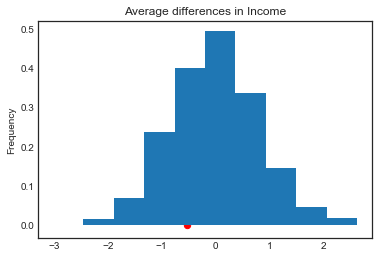

In [9]:
title = 'Average differences in Income'
pd.Series(differences).plot(kind='hist', density=True, title=title)
plt.scatter(observed_difference, 0, color='red', s=40);

In [10]:
p_val = np.count_nonzero(differences <= observed_difference) / n_repetitions
p_val

0.275

In [11]:
adults = df[df['EDUCATION_ADULT'].isnull() == False]
adult_gender_edu_usage = adults[['GENDER', 'EDUCATION_ADULT', 'EVER_USE']]
adult_gender_edu_usage['GENDER'] = adult_gender_edu_usage['GENDER'].replace({1: 'Male', 2: 'Female'})
adult_gender_edu_usage['EVER_USE'] = adult_gender_edu_usage['EVER_USE'].replace({1: True, 2: False})
adult_gender_edu_usage = adult_gender_edu_usage[adult_gender_edu_usage['EVER_USE'].isnull() == False]
adult_gender_edu_usage.head()

,GENDER,EDUCATION_ADULT,EVER_USE
1,Male,3.0,False
2,Female,5.0,False
3,Female,4.0,True
4,Male,4.0,True
5,Female,4.0,True


In [12]:
edu_cnts = adult_gender_edu_usage.pivot_table(index='EDUCATION_ADULT', columns='GENDER', values = 'EVER_USE', 
                                               aggfunc='size')
edu_cnts

GENDER,Female,Male
EDUCATION_ADULT,,
1.0,128,124
2.0,159,210
3.0,327,363
4.0,563,440
5.0,474,394


In [13]:
cond_distr = edu_cnts.apply(lambda x: x / x.sum())
cond_distr

GENDER,Female,Male
EDUCATION_ADULT,,
1.0,0.077529,0.080993
2.0,0.096305,0.137165
3.0,0.198062,0.237100
4.0,0.341005,0.287394
5.0,0.287099,0.257348


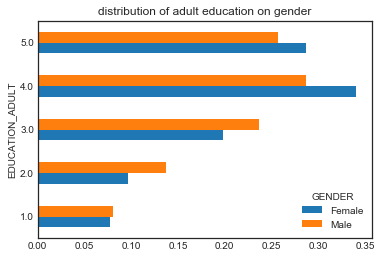

In [14]:
title='distribution of adult education on gender'
cond_distr.plot(kind='barh', title=title);

In [15]:
cond_distr.diff(axis=1).iloc[-1].abs().sum()

0.0297505895720227

In [16]:
# test stat
def tvd_of_groups(df):
    cnts = df.pivot_table(index='EDUCATION_ADULT', columns='GENDER', aggfunc='size')
    distr = cnts.apply(lambda x: x / x.sum())
    return distr.diff(axis=1).iloc[-1].abs().sum()

In [17]:
obs = tvd_of_groups(adult_gender_edu_usage)
obs

0.0297505895720227

In [18]:
N = 1000
tvds = []
for _ in range(N):
    
    s = adult_gender_edu_usage['GENDER'].sample(frac=1, replace=False).reset_index(drop=True)
    shuffled = adult_gender_edu_usage.loc[:, ['EDUCATION_ADULT', 'EVER_USE']].assign(GENDER=s)
    tvds.append(tvd_of_groups(shuffled))

tvds = pd.Series(tvds)

In [19]:
pval = (tvds >= obs).sum() / N
pval

0.124